In [2]:
import os

import matplotlib.pyplot as plt
import numpy as np

In [3]:
os.makedirs('figures', exist_ok=True)

## Average MAE for all Models

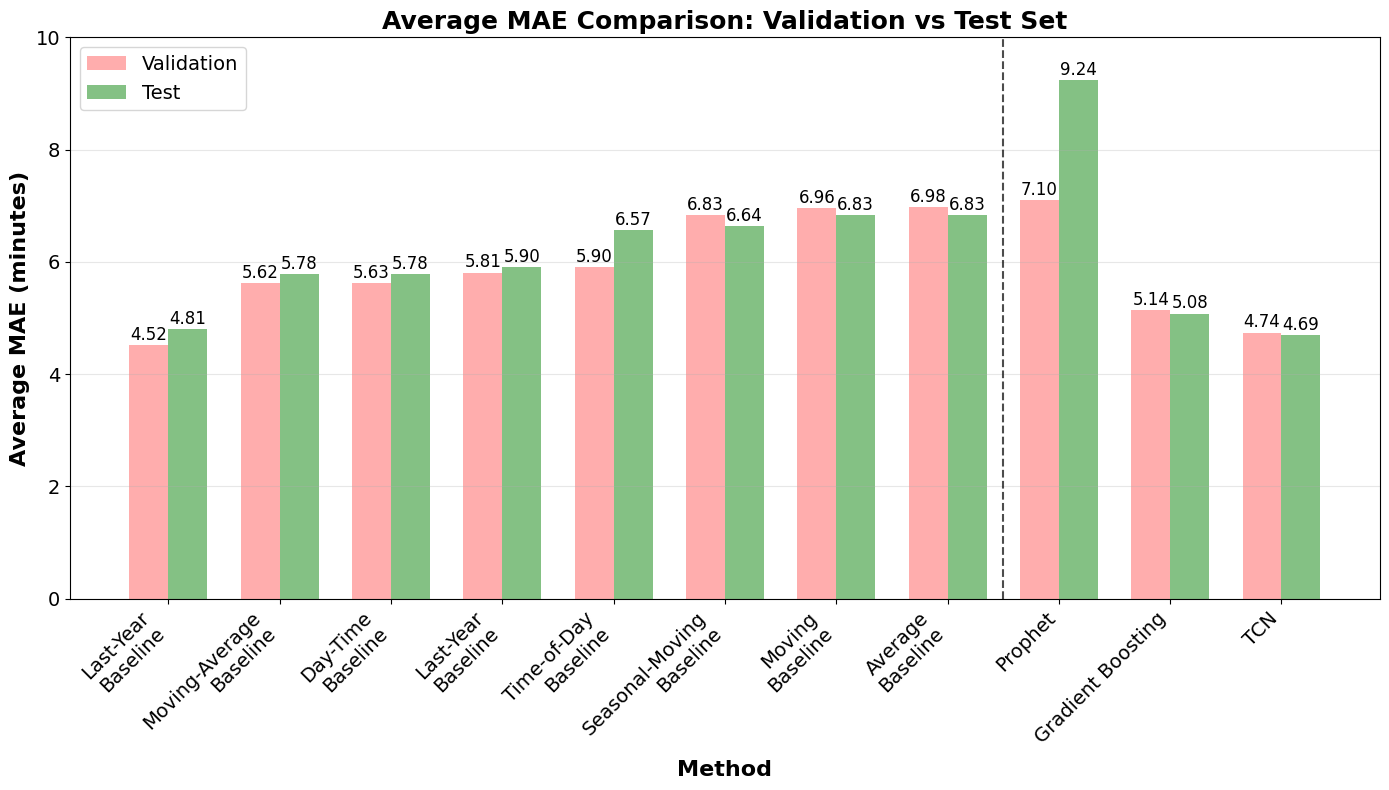

In [4]:
models = [
    'Last-Year\nBaseline',
    'Moving-Average\nBaseline', 
    'Day-Time\nBaseline',
    'Last-Year\nBaseline',
    'Time-of-Day\nBaseline',
    'Seasonal-Moving\nBaseline',
    'Moving\nBaseline',
    'Average\nBaseline',

    'Prophet',
    'Gradient Boosting',
    'TCN'
]

# MAE values (extracted from the chart)
validation_mae = [4.52, 5.62, 5.63, 5.81, 5.90, 6.83, 6.96, 6.98, 7.1, 5.14, 4.74]
test_mae = [4.81, 5.78, 5.78, 5.90, 6.57, 6.64, 6.83, 6.83, 9.24, 5.08, 4.69]

# Set up the plot
fig, ax = plt.subplots(figsize=(14, 8))

# Define bar width and positions
bar_width = 0.35
x_pos = np.arange(len(models))

# Create bars
validation_bars = ax.bar(x_pos - bar_width/2, validation_mae, bar_width, 
                        label='Validation', color='#FF9999', alpha=0.8)
test_bars = ax.bar(x_pos + bar_width/2, test_mae, bar_width, 
                  label='Test', color='#66B266', alpha=0.8)

# Add value labels on top of bars
for i, (val_bar, test_bar) in enumerate(zip(validation_bars, test_bars)):
    # Validation bar labels
    height = val_bar.get_height()
    ax.text(val_bar.get_x() + val_bar.get_width()/2., height + 0.02,
            f'{validation_mae[i]:.2f}', ha='center', va='bottom', fontsize=12)
    
    # Test bar labels
    height = test_bar.get_height()
    ax.text(test_bar.get_x() + test_bar.get_width()/2., height + 0.02,
            f'{test_mae[i]:.2f}', ha='center', va='bottom', fontsize=12)

# Customize the plot
ax.set_xlabel('Method', fontsize=16, fontweight='bold')
ax.set_ylabel('Average MAE (minutes)', fontsize=16, fontweight='bold')
ax.set_title('Average MAE Comparison: Validation vs Test Set', fontsize=18, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(models, rotation=45, ha='right', fontsize=14)

# Set y-axis limits to match the original
ax.set_ylim(0, 10)

# Add vertical line between baseline and dummy models
# Position it between index 7 (last baseline) and 8 (first dummy)
ax.axvline(x=7.5, color='black', linestyle='--', linewidth=1.5, alpha=0.7)

# Add legend
ax.legend(loc='upper left', fontsize=14)

# Add grid for better readability
ax.grid(True, alpha=0.3, axis='y')

ax.tick_params(axis='both', which='major', labelsize=14)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Display the plot
plt.show()

fig.savefig('figures/val_vs_test_comparison.svg')